In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


PDI - Processamento Digital de Imagens
<br>Aluno: Felipe Miranda Cardoso de Sá
<br>Professor: Cássio Denner
<br>Matrícula: 201802677

In [2]:
ireland_dynamicmed64 = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/ireland-06-dynamicmed64.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas
ireland_dynamiclow06 = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/ireland-06-dynamiclow06.tif', cv2.IMREAD_GRAYSCALE)
ireland_dynamichigh = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/ireland-06-dynamichigh.tif', cv2.IMREAD_GRAYSCALE)

airfield = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/airfield-05.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas
airfield_small_auto = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/airfield-05small-auto.tif', cv2.IMREAD_GRAYSCALE)
airfield_small = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/airfield-05small.tif', cv2.IMREAD_GRAYSCALE)

keth = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/new_keth.jpeg", cv2.IMREAD_GRAYSCALE)
lena = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/lena.png", cv2.IMREAD_GRAYSCALE)


#  1 - Quantização

Utilizando ferramentas computacionais podemos ver a imagem:

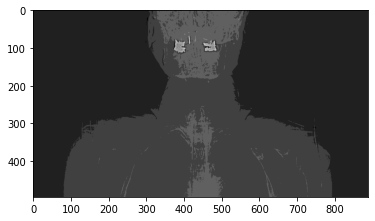

In [47]:
img = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/tac.tif", cv2.IMREAD_GRAYSCALE)
plt.figure(0)
plt.imshow(img, cmap='gray') # especificar color map

In [48]:
W, H = img.shape
print('Dimensões:',img.shape)
print('Tipo-Dados:',img.dtype)
print('Pixels:',W*H)
print('Tamanho:',W*H/1024)
import sys
print('Tam. Obj.:', sys.getsizeof(img)/1024)

Dimensões: (495, 888)
Tipo-Dados: uint8
Pixels: 439560
Tamanho: 429.2578125
Tam. Obj.: 429.375


In [49]:
def computa_histograma(img):
    """Computa um histograma simples - veja em Burger/2016 e slides da aula de 04/08
    Args:
        img: WxH array de in teiros int. Imagem de entrada.
        
    Retorna:
        h: array numpy de 256 inteiros int. Histograma da imagem.
    """

    W, H = img.shape # pega largura e altura da imagem
    h = np.zeros(256, np.uint64) # inicializa h, inteiros maiores
    for v in range(0,H): 
        for u in range(0,W):
            i = img[u,v]
            h[i] = h[i]+1
    
    return h

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0     70 239362 163815  34876    454
    630    281     67      5      0      0      0      0      0      0
      

<BarContainer object of 256 artists>

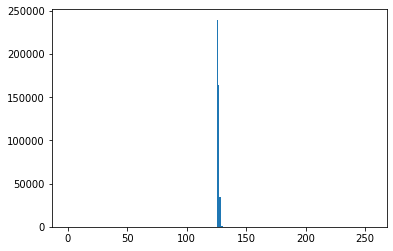

In [50]:
# Histograma implementado
hist_computado=computa_histograma(img)
print(hist_computado)
#plt.bar(range(0, 256), hist_computado) # há distancia entre as barras, usar outros parametros e tirar bordas/distância
plt.bar(range(0, 256), hist_computado, linewidth=0, width=1) # testes, facecolor='black', edgecolor='black')

Ao analisarmos as equações L = 2^k observamos a representação dos níveis discretos de intensidade. O processo de amostragem é feito a partir da quantização para L níveis de cinza.

In [54]:
n_divs = 2
while(n_divs <= 256):
  quant = img // n_divs*n_divs + n_divs // 2
  img_out = cv2.imwrite(f'./{n_divs}_image.tif', quant)
  n_divs = n_divs * 2

In [62]:
new_img = cv2.imread("./4_image.tif", cv2.IMREAD_GRAYSCALE)

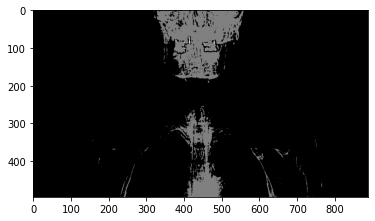

In [63]:
plt.figure(0)
plt.imshow(new_img, cmap='gray') # especificar color map

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0 403247      0      0      0
  36241      0      0      0     72      0      0      0      0      0
      

<BarContainer object of 256 artists>

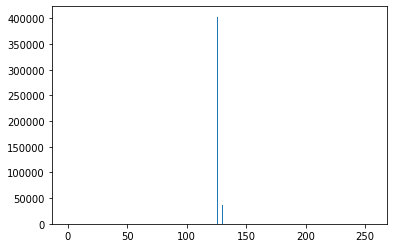

In [64]:
# Histograma implementado
hist_computado=computa_histograma(new_img)
print(hist_computado)
#plt.bar(range(0, 256), hist_computado) # há distancia entre as barras, usar outros parametros e tirar bordas/distância
plt.bar(range(0, 256), hist_computado, linewidth=0, width=1) # testes, facecolor='black', edgecolor='black')

# 2 - Operações Ponto a ponto

Operações homogêneas são aquelas que independem de valores de pixels vizinhos, todos os valores serão modificados de forma homogênea pela imagem.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

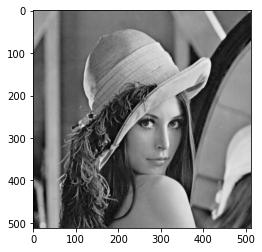

In [ ]:
plt.figure(0)
plt.imshow(lena, cmap='gray') # especificar color map
#plt.axis('off')

In [ ]:
def aumenta_brilho(img, intensidade):
  W, H = img.shape 
  for v in range(0,H): 
      for u in range(0,W):
          if (img[u,v] + intensidade) >= 255:
            img[u,v] = 255
          elif (img[u,v] + intensidade) <= 0:
            img[u,v] = 0
          else:
            img[u,v] += intensidade
          
  return img

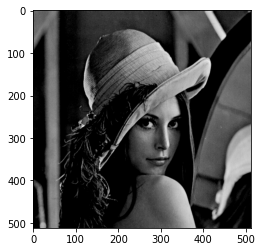

In [ ]:
lena_aumentada = aumenta_brilho(lena, -100)
plt.imshow(lena_aumentada, cmap='gray')

In [ ]:
def inverte_cores(img):
  W, H = img.shape 
  for v in range(0,H): 
      for u in range(0,W):
          #if (img[u,v] + intensidade) >= 255:
          #  img[u,v] = 255
          #elif (img[u,v] + intensidade) <= 0:
          #  img[u,v] = 0
          #else:
            img[u,v] *= -1
          
  return img

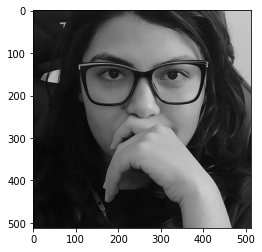

In [ ]:
plt.imshow(keth, cmap='gray')

In [ ]:
keth_invertida = inverte_cores(keth)

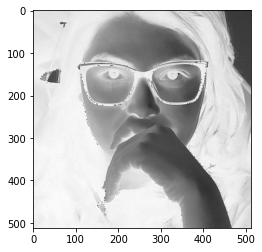

In [ ]:
plt.imshow(keth_invertida, cmap='gray')

Operação Logarítmica

In [ ]:
def log_img(img):
  W, H = img.shape 
  for v in range(0,H): 
      for u in range(0,W):
          if (np.log(img[u,v])) >= 255:
            img[u,v] = 255
          elif (np.log(img[u,v])) <= 0:
            img[u,v] = 0
          else:
            img[u,v] = np.log(img[u,v])
          
  return img

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


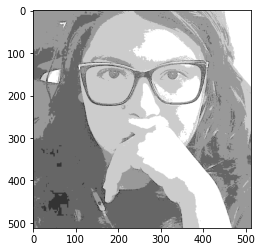

In [ ]:
keth = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/new_keth.jpeg", cv2.IMREAD_GRAYSCALE)
log_img(keth)
plt.imshow(keth, cmap='gray')

In [ ]:
def log_inv_img(img):
  W, H = img.shape 
  for v in range(0,H): 
      for u in range(0,W):
            img[u,v] = np.log(1 / img[u,v])
          
  return img

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


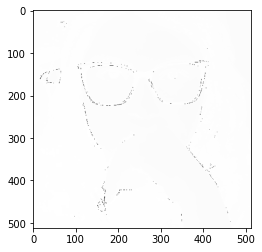

In [ ]:
keth = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/new_keth.jpeg", cv2.IMREAD_GRAYSCALE)
log_inv_img(keth)
plt.imshow(keth, cmap='gray')

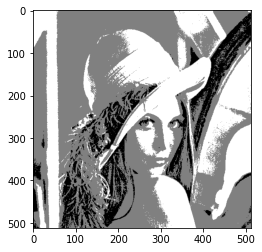

In [ ]:
lena = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/lena.png", cv2.IMREAD_GRAYSCALE)
log_img(lena)
plt.imshow(lena, cmap='gray')

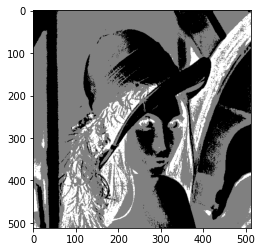

In [ ]:
lena = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/lena.png", cv2.IMREAD_GRAYSCALE)
log_inv_img(lena)
plt.imshow(lena, cmap='gray')

In [ ]:
def exp_img(img):
  W, H = img.shape 
  for v in range(0,H): 
      for u in range(0,W):
          if (np.exp(img[u,v])) >= 255:
            img[u,v] = 255
          elif (np.exp(img[u,v])) <= 0:
            img[u,v] = 0
          else:
            img[u,v] = np.exp(img[u,v])
          
  return img

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


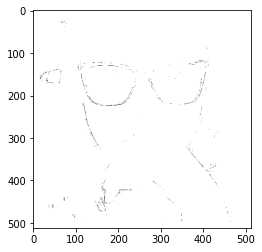

In [ ]:
keth = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/new_keth.jpeg", cv2.IMREAD_GRAYSCALE)
exp_img(keth)
plt.imshow(keth, cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


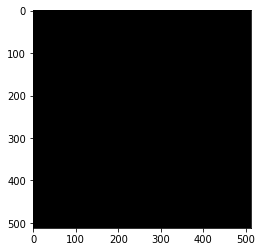

In [ ]:
lena = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/lena.png", cv2.IMREAD_GRAYSCALE)
lena = exp_img(lena)
plt.imshow(lena, cmap='gray')